### Importación de datos



In [1]:
import pandas as pd

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



### 1.- Suma de todos los valores en la columna Precio de cada una de las tiendas y la suma total

In [2]:
# Función para el calculo de la suma total de ingresos: 

def totalDeIngresos(lista) -> float:
    suma = 0

    for valor in lista.values(): # Porque es un diccionario se utiliza el .values()
        suma += valor

    return suma

In [3]:
ingresos = {"Tienda1": tienda1["Precio"].sum(),
            "Tienda2": tienda2["Precio"].sum(),
            "Tienda3": tienda3["Precio"].sum(),
            "Tienda4": tienda4["Precio"].sum(),}

for tienda, ingreso in ingresos.items():
    print(f"{tienda}: ${ingreso:,.2f}")

ingresosTotales = totalDeIngresos(ingresos)

print(f"\nEl total de ingresos entre las 4 tiendas fue de: {ingresosTotales:,.2f}")

Tienda1: $1,150,880,400.00
Tienda2: $1,116,343,500.00
Tienda3: $1,098,019,600.00
Tienda4: $1,038,375,700.00

El total de ingresos entre las 4 tiendas fue de: 4,403,619,200.00


### 2.- Se grafican los ingresos de cada tienda y el porcentaje de ingresos de cada tienda con respecto al total de ingresos

In [4]:
import matplotlib
from matplotlib import pyplot as plt

import random

import numpy as np

Text(0, 0.5, 'Ingresos')

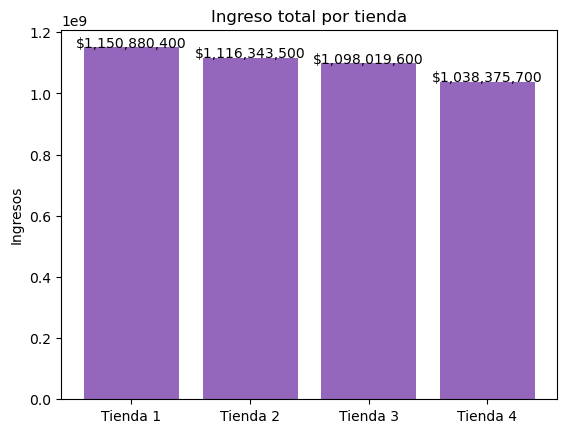

In [5]:
nombresTiendas = ["Tienda 1", 
                  "Tienda 2", 
                  "Tienda 3", 
                  "Tienda 4"]

# Ingresos de cada tienda

plt.bar(x = nombresTiendas, height = list(ingresos.values()), color = "tab:purple")
plt.title("Ingreso total por tienda")

for i, ingreso in enumerate(ingresos.values()): # Usando enumerate porque se utilizan 2 variables (i e ingresos)
    plt.text(i, ingreso, f"${ingreso:,.0f}", ha ='center')

plt.ylabel("Ingresos")

Text(0, 0.5, 'Porcentaje que representan')

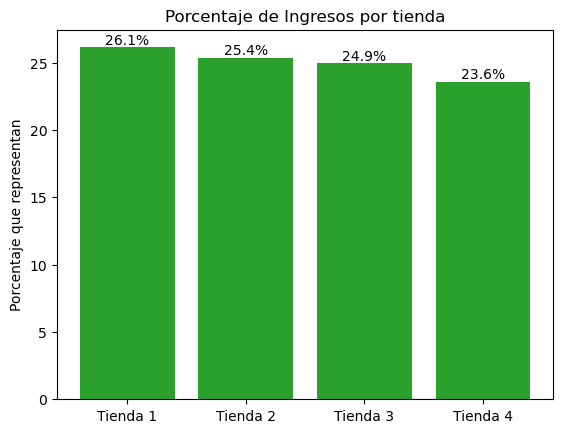

In [6]:
# Porcentaje de ingresos de cada tienda con respecto al total de ingresos

nombresTiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

porcentajeIngresosCadaTienda = [(ingreso / ingresosTotales) * 100 for ingreso in ingresos.values()]
porcentajeIngresosCadaTienda

plt.bar(x = nombresTiendas, height = porcentajeIngresosCadaTienda, color = "tab:green")
plt.title("Porcentaje de Ingresos por tienda")

for i, porcentaje in enumerate(porcentajeIngresosCadaTienda):
    plt.text(i, porcentaje + 0.25, f"{porcentaje:.1f}%", ha='center')

plt.ylabel("Porcentaje que representan")

#### Cada una de las tiendas son demasido parejas, representando entre un 23% a 26% de las ventas totales cada una, pero aun así la que representa la mayor cantidad es la Tienda 1.

# 2. Ventas por categoría

### 1.- Cantidad de productos vendidos por categoria en cada tienda

In [7]:
categoriasTienda1 = list(tienda1["Categoría del Producto"].value_counts().items()) # value_counts se encarga de devolver una serie de de pandas (ya con indice y valor de cada item),
categoriasTienda2 = list(tienda2["Categoría del Producto"].value_counts().items()) # y con .item lo convierte en una tupla. ordenado de mayor a menor por defecto
categoriasTienda3 = list(tienda3["Categoría del Producto"].value_counts().items())
categoriasTienda4 = list(tienda4["Categoría del Producto"].value_counts().items())

"""
Pero también se puede hacer por separado sacando el indice y el valor que devuelve la serie de pandas y se hace el zip y list para el caso de convertirlo a tuplas, como:

categorias = tienda1["Categoría del Producto"].value_counts().index
cantidades = tienda1["Categoría del Producto"].value_counts().values

list(zip(categorias,cantidades)) 
"""

listaCategoriasTienda = [categoriasTienda1,
                         categoriasTienda2,
                         categoriasTienda3,
                         categoriasTienda4]

for i,tienda in enumerate(listaCategoriasTienda):
    print(f"Para la tienda {i+1} sus ventas por categoría son: {tienda}")

Para la tienda 1 sus ventas por categoría son: [('Muebles', 465), ('Electrónicos', 448), ('Juguetes', 324), ('Electrodomésticos', 312), ('Deportes y diversión', 284), ('Instrumentos musicales', 182), ('Libros', 173), ('Artículos para el hogar', 171)]
Para la tienda 2 sus ventas por categoría son: [('Muebles', 442), ('Electrónicos', 422), ('Juguetes', 313), ('Electrodomésticos', 305), ('Deportes y diversión', 275), ('Instrumentos musicales', 224), ('Libros', 197), ('Artículos para el hogar', 181)]
Para la tienda 3 sus ventas por categoría son: [('Muebles', 499), ('Electrónicos', 451), ('Juguetes', 315), ('Electrodomésticos', 278), ('Deportes y diversión', 277), ('Libros', 185), ('Instrumentos musicales', 177), ('Artículos para el hogar', 177)]
Para la tienda 4 sus ventas por categoría son: [('Muebles', 480), ('Electrónicos', 451), ('Juguetes', 338), ('Deportes y diversión', 277), ('Electrodomésticos', 254), ('Artículos para el hogar', 201), ('Libros', 187), ('Instrumentos musicales', 17

### 2.- Graficas referentes a la cantidad de productos vendidos por categoria en cada tienda.

In [ ]:
def graficarCategoriasPorTienda(listaCategorias, nombre, color='blue'):
    categorias, cantidades = zip(*listaCategorias) # Proceso inverso del zip para des-tuplar jejej
    
    # Crear gráfico de líneas con marcadores
    plt.plot(categorias, cantidades, color=color, marker='o', linewidth=2, markersize=8)
    plt.title(f"Cantidad de productos por categoría ({nombre})")
    
    # Agregar texto sobre cada punto
    for i, cantidad in enumerate(cantidades):
        plt.text(i, cantidad + 0.5, str(cantidad), ha='center')
    
    plt.xticks(rotation=90) # Para que no se encimen los títulos de las categorías
    plt.ylabel("Cantidad")
    plt.xlabel("Categoría del producto")
    plt.grid(True, alpha=0.3) # Opcional: agregar grilla para mejor lectura
    plt.tight_layout()
    plt.show()

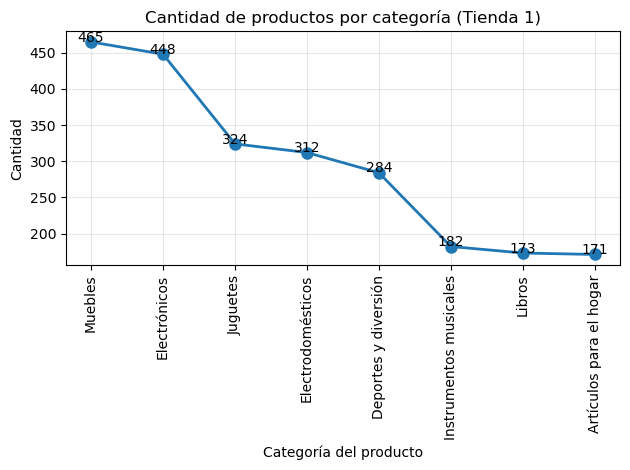

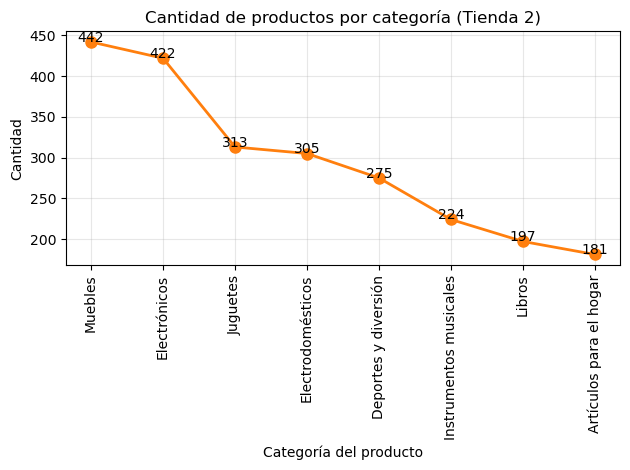

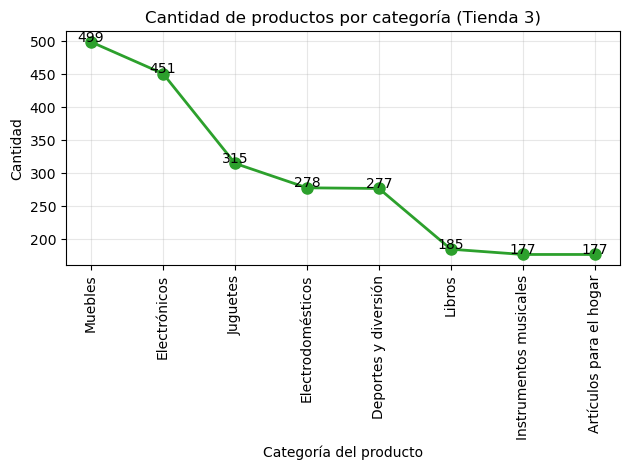

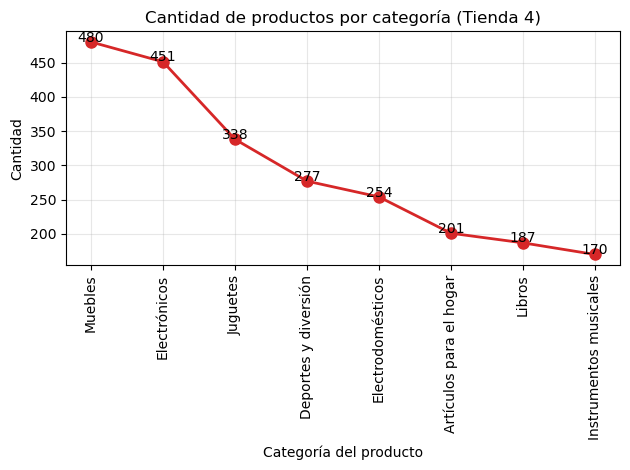

In [9]:
listaCategoriasTienda = [categoriasTienda1,
                         categoriasTienda2,
                         categoriasTienda3,
                         categoriasTienda4]

nombresTiendas = ["Tienda 1", 
                  "Tienda 2", 
                  "Tienda 3", 
                  "Tienda 4"]

colores = ["tab:blue", 
           "tab:orange", 
           "tab:green", 
           "tab:red", 
           "tab:purple"]

for i,tienda in enumerate(listaCategoriasTienda):
    graficarCategoriasPorTienda(tienda, nombresTiendas[i],colores[i])


#### Se observa que en las 4 tiendas los 3 productos que más se venden son: 

        * Muebles
        * Electrónicos 
        * Juguetes

#### Donde entre Electrónicos y Jugues venden algo muy muy similar (entre 330 a 500 articulos por categoria), pero en muebles la Tienda 1 y 2 cenden al rededor de 50 muebles menos que las tiendas 3 y 4. Además en los demás productos venden algo muy similar pero en menor cantidad de articulos (entre 170 a 320)

# 3. Calificación promedio de la tienda


### 1.- Calificación de los clientes de cada uno de los productos vendidos y la calificación general de la tienda

In [30]:
# Promedio de las calificaciones por producto por cada tienda (por eso solo mean para el promedio)
 
conteoPromedioCalificacionesPorTienda1 = tienda1.groupby("Producto")["Calificación"].mean()
promedioCalificacionesPorProductoTienda1 = [(producto, calificacion) for producto, calificacion in conteoPromedioCalificacionesPorTienda1.items()]

conteoPromedioCalificacionesPorTienda2 = tienda2.groupby("Producto")["Calificación"].mean()
promedioCalificacionesPorProductoTienda2 = [(producto, calificacion) for producto, calificacion in conteoPromedioCalificacionesPorTienda2.items()]

conteoPromedioCalificacionesPorTienda3 = tienda3.groupby("Producto")["Calificación"].mean()
promedioCalificacionesPorProductoTienda3 = [(producto, calificacion) for producto, calificacion in conteoPromedioCalificacionesPorTienda3.items()]

conteoPromedioCalificacionesPorTienda4 = tienda4.groupby("Producto")["Calificación"].mean()
promedioCalificacionesPorProductoTienda4 = [(producto, calificacion) for producto, calificacion in conteoPromedioCalificacionesPorTienda4.items()]

listaPromediosCalificacionesPorTienda = [promedioCalificacionesPorProductoTienda1,
                           promedioCalificacionesPorProductoTienda2,
                           promedioCalificacionesPorProductoTienda3,
                           promedioCalificacionesPorProductoTienda4]

for i,tienda in enumerate(listaPromediosCalificacionesPorTienda):
    # Desglosamos la tupla para poder darle formato por separado

    calificaciones = [(producto, f"{calificacion:.2f}") for producto, calificacion in tienda]
    
    print(f"Para la tienda {i + 1} sus calificaciones promedio por producto son: {calificaciones}")

Para la tienda 1 sus calificaciones promedio por producto son: [('Ajedrez de madera', '4.43'), ('Armario', '3.95'), ('Asistente virtual', '4.08'), ('Auriculares', '3.64'), ('Auriculares con micrófono', '3.97'), ('Balón de baloncesto', '3.87'), ('Balón de voleibol', '4.07'), ('Batería', '4.19'), ('Bicicleta', '3.94'), ('Bloques de construcción', '4.09'), ('Cama box', '4.11'), ('Cama king', '3.77'), ('Carrito de control remoto', '4.13'), ('Celular ABXY', '3.82'), ('Ciencia de datos con Python', '4.10'), ('Cubertería', '4.23'), ('Cubo mágico 8x8', '4.07'), ('Cuerda para saltar', '3.62'), ('Dashboards con Power BI', '3.95'), ('Dinosaurio Rex', '3.77'), ('Estufa', '4.13'), ('Guitarra acústica', '3.96'), ('Guitarra eléctrica', '4.09'), ('Impresora', '4.17'), ('Iniciando en programación', '4.29'), ('Iphone 15', '3.94'), ('Juego de mesa', '3.98'), ('Kit de bancas', '4.11'), ('Lavadora de ropa', '4.13'), ('Lavavajillas', '4.02'), ('Mesa de centro', '4.02'), ('Mesa de comedor', '3.80'), ('Mesa d

In [29]:
# Calificación general de las tiendas

promedioCalificacionGeneralTienda1 = tienda1["Calificación"].mean()
promedioCalificacionGeneralTienda2 = tienda2["Calificación"].mean()
promedioCalificacionGeneralTienda3 = tienda3["Calificación"].mean()
promedioCalificacionGeneralTienda4 = tienda4["Calificación"].mean()

promediosGenerales = [
    promedioCalificacionGeneralTienda1,
    promedioCalificacionGeneralTienda2,
    promedioCalificacionGeneralTienda3,
    promedioCalificacionGeneralTienda4
]

# Mostrar resultados correctos
for i in range(len(promediosGenerales)):
    print(f"Para la tienda {i + 1} la calificación promedio REAL de los clientes es de: {promediosGenerales[i]:.2f}")

Para la tienda 1 la calificación promedio REAL de los clientes es de: 3.98
Para la tienda 2 la calificación promedio REAL de los clientes es de: 4.04
Para la tienda 3 la calificación promedio REAL de los clientes es de: 4.05
Para la tienda 4 la calificación promedio REAL de los clientes es de: 4.00


### 2.- Gráficas correspondientes a la calificación de clientes por producto en cada tienda

In [34]:
def graficarPromediosPorProductoTienda(listaPromedios, nombre, color):
    productos, promedios = zip(*listaPromedios)  # Des-tuplar la tupla
    
    plt.figure(figsize=(15, 6))
    plt.bar(productos, promedios, color=color)
    plt.title(f"Promedio de calificaciones por producto ({nombre})")

    for i, promedio in enumerate(promedios):
        plt.text(i, promedio + 0.05, f"{promedio:.2f}", ha='center', fontsize = 6)
    
    plt.xticks(rotation=90, fontsize = 6)
    plt.ylabel("Promedio de calificación")
    plt.xlabel("Producto")
    plt.tight_layout()
    plt.show()

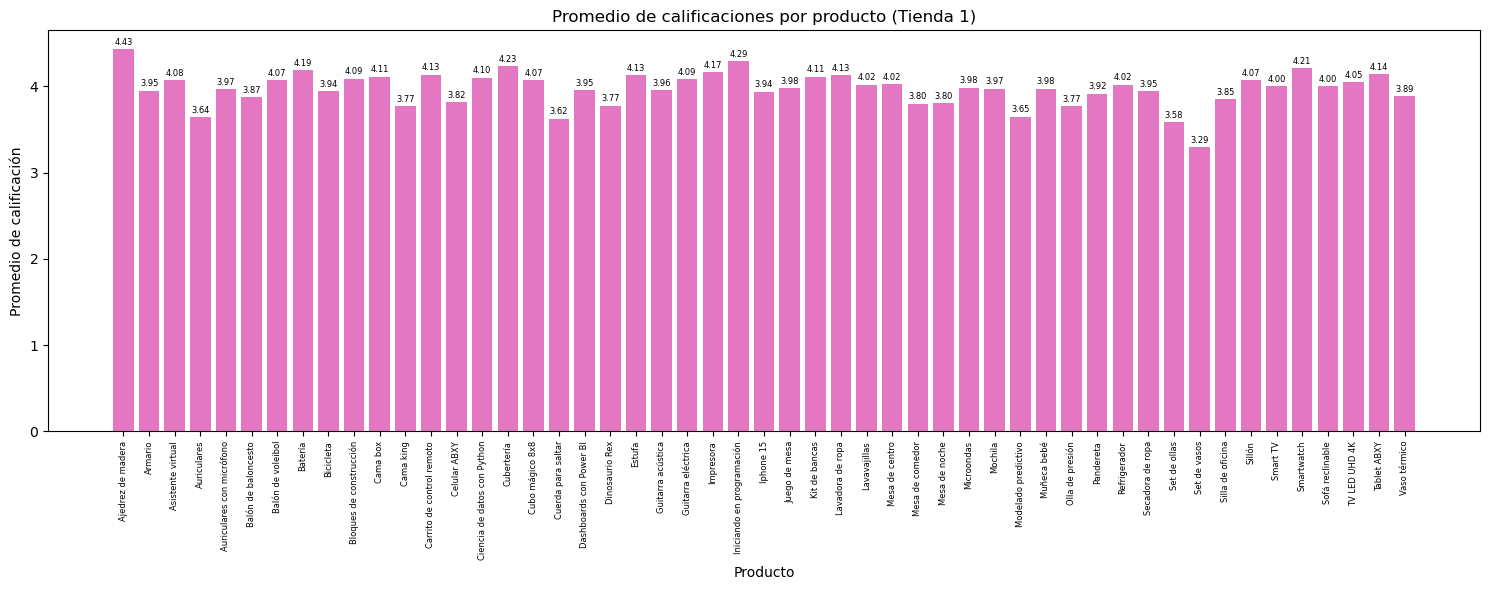

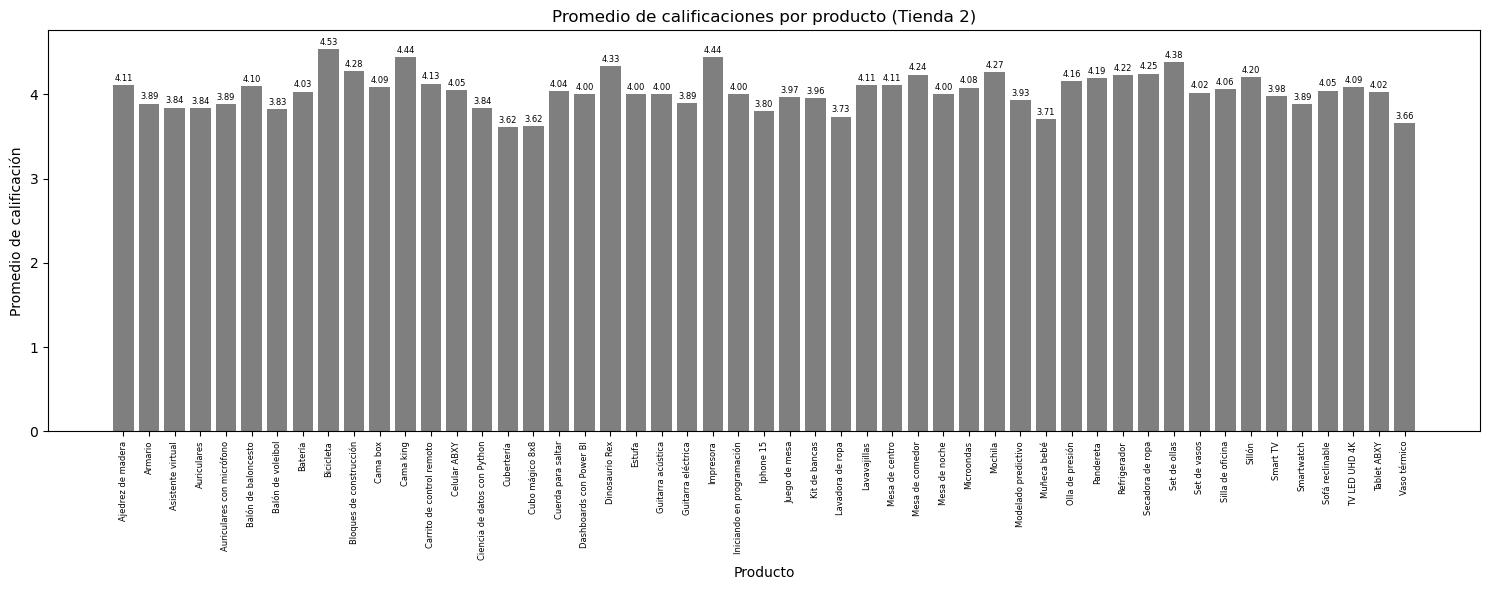

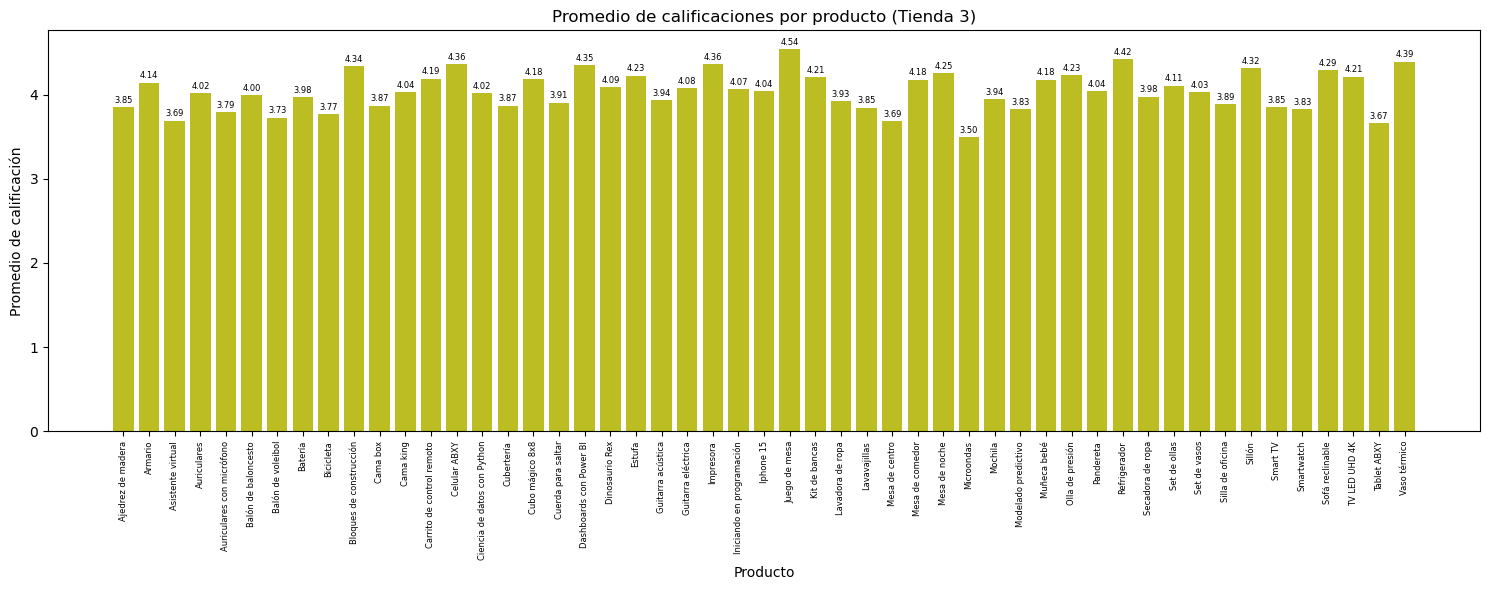

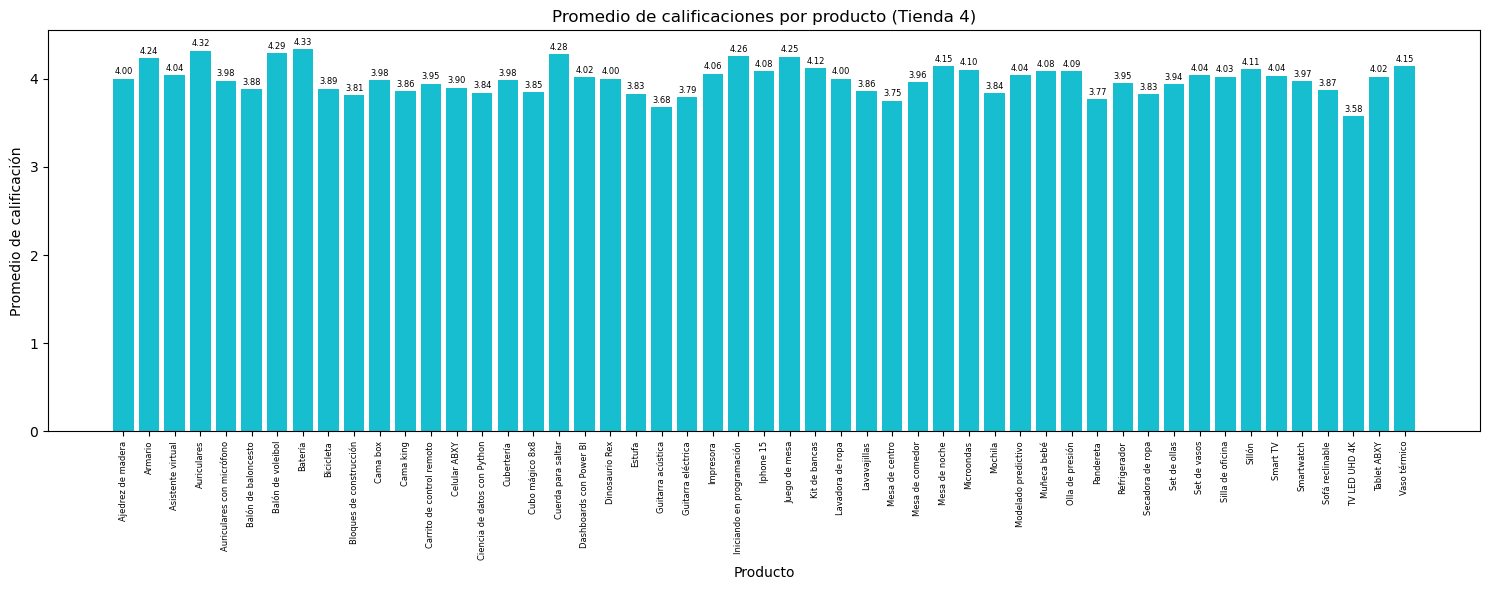

In [14]:
listaPromediosCalificacionesPorTienda = [promedioCalificacionesPorProductoTienda1,
                           promedioCalificacionesPorProductoTienda2,
                           promedioCalificacionesPorProductoTienda3,
                           promedioCalificacionesPorProductoTienda4]

nombresTiendas = ["Tienda 1", 
                  "Tienda 2", 
                  "Tienda 3", 
                  "Tienda 4"]

colores = ["tab:pink", 
           "tab:gray", 
           "tab:olive", 
           "tab:cyan", 
           "tab:brown"]

for i,tienda in enumerate(listaPromediosCalificacionesPorTienda):
    graficarPromediosPorProductoTienda(tienda, nombresTiendas[i],colores[i])

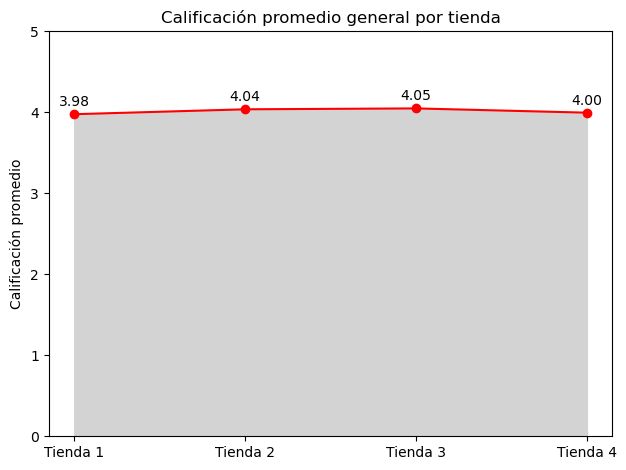

In [33]:
nombresTiendas = ["Tienda 1", 
                  "Tienda 2", 
                  "Tienda 3", 
                  "Tienda 4"]

colores = ["tab:pink", 
           "tab:gray", 
           "tab:olive", 
           "tab:cyan", 
           "tab:brown"]

# Usando promedio de calificaciones por tienda calculado previamente

# Uso de numpy para el ploteo de arrays para graficar las posiciones en el eje x
x = np.arange(len(nombresTiendas))

plt.fill_between(x, promediosGenerales, color='lightgrey')
plt.plot(x, promediosGenerales, marker='o', color='red')

plt.xticks(x, nombresTiendas)
plt.ylim(0, 5)
plt.ylabel("Calificación promedio")
plt.title("Calificación promedio general por tienda")

# Mostrar valores en cada punto
for i, valor in enumerate(promediosGenerales):
    plt.text(i, valor + 0.1, f"{valor:.2f}", ha='center')

plt.tight_layout()
plt.show()


#### Se observa que las tiendas 2 y 3 tienen una mayor satisfacción y en general en las gráficas se observa que son las que cuentan con mejores calificaciones constantes en todos los productos, a diferencia de la tienda 1 que tiene productos con muy buena calificacón pero otros que baja mucho su calificación.

# 4. Productos más y menos vendidos

### 1.- Productos más vendidos en cada una de las tiendas.

In [16]:
# Para cada tienda contar cuántas veces aparece cada producto
conteoVentasTienda1 = tienda1["Producto"].value_counts()
productosMasVendidosTienda1 = [(producto, cantidad) for producto, cantidad in conteoVentasTienda1.items()]

conteoVentasTienda2 = tienda2["Producto"].value_counts()
productosMasVendidosTienda2 = [(producto, cantidad) for producto, cantidad in conteoVentasTienda2.items()]

conteoVentasTienda3 = tienda3["Producto"].value_counts()
productosMasVendidosTienda3 = [(producto, cantidad) for producto, cantidad in conteoVentasTienda3.items()]

conteoVentasTienda4 = tienda4["Producto"].value_counts()
productosMasVendidosTienda4 = [(producto, cantidad) for producto, cantidad in conteoVentasTienda4.items()]

listaProductosMasVendidosPorTienda = [
    productosMasVendidosTienda1,
    productosMasVendidosTienda2,
    productosMasVendidosTienda3,
    productosMasVendidosTienda4
]

for i, tienda in enumerate(listaProductosMasVendidosPorTienda):
    print(f"Para la tienda {i + 1}, los productos más vendidos son: {tienda}")

Para la tienda 1, los productos más vendidos son: [('TV LED UHD 4K', 60), ('Armario', 60), ('Microondas', 60), ('Secadora de ropa', 58), ('Bloques de construcción', 56), ('Mesa de noche', 56), ('Balón de baloncesto', 55), ('Vaso térmico', 54), ('Impresora', 54), ('Bicicleta', 54), ('Refrigerador', 54), ('Batería', 53), ('Cubertería', 52), ('Carrito de control remoto', 52), ('Modelado predictivo', 51), ('Auriculares', 50), ('Iphone 15', 49), ('Ajedrez de madera', 49), ('Lavavajillas', 48), ('Lavadora de ropa', 47), ('Guitarra eléctrica', 47), ('Guitarra acústica', 46), ('Sofá reclinable', 46), ('Silla de oficina', 46), ('Estufa', 45), ('Kit de bancas', 44), ('Cama box', 44), ('Cubo mágico 8x8', 44), ('Mesa de centro', 44), ('Cama king', 44), ('Smart TV', 44), ('Set de ollas', 43), ('Smartwatch', 43), ('Juego de mesa', 43), ('Dashboards con Power BI', 42), ('Tablet ABXY', 42), ('Balón de voleibol', 42), ('Set de vasos', 41), ('Iniciando en programación', 41), ('Sillón', 41), ('Asistente 

### 2.- Gráfica correspondiente a los productos más vendidos por tienda

In [17]:
def graficarProductosMasVendidosPorTienda(listaProductos, nombre, color):
    productos, cantidades = zip(*listaProductos)

    plt.figure(figsize=(15, 6))
    plt.bar(x=productos, height=cantidades, color=color)
    plt.title(f"Productos más vendidos ({nombre})")
    
    for i, cantidad in enumerate(cantidades):
        plt.text(i, cantidad + 0.5, str(cantidad), ha='center', fontsize = 6)

    plt.xticks(rotation=90, fontsize = 6)
    plt.xlabel("Cantidad de ventas")
    plt.ylabel("Producto")
    plt.tight_layout()
    plt.show()

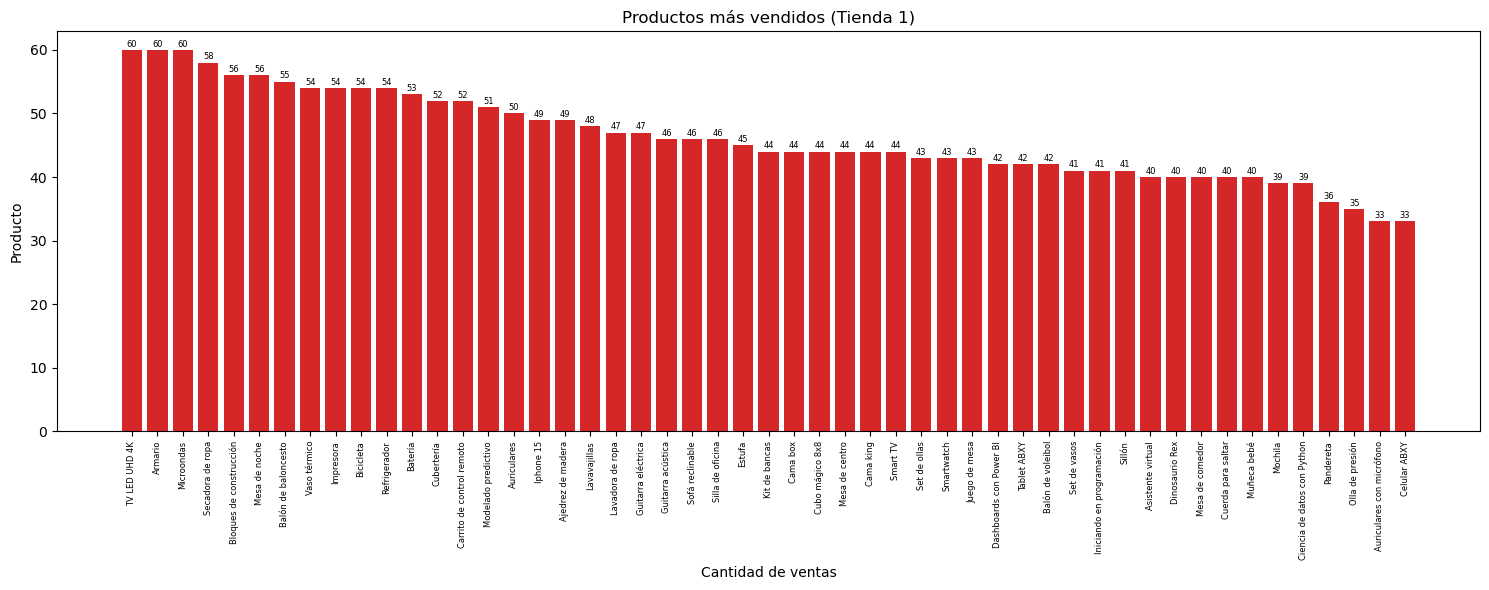

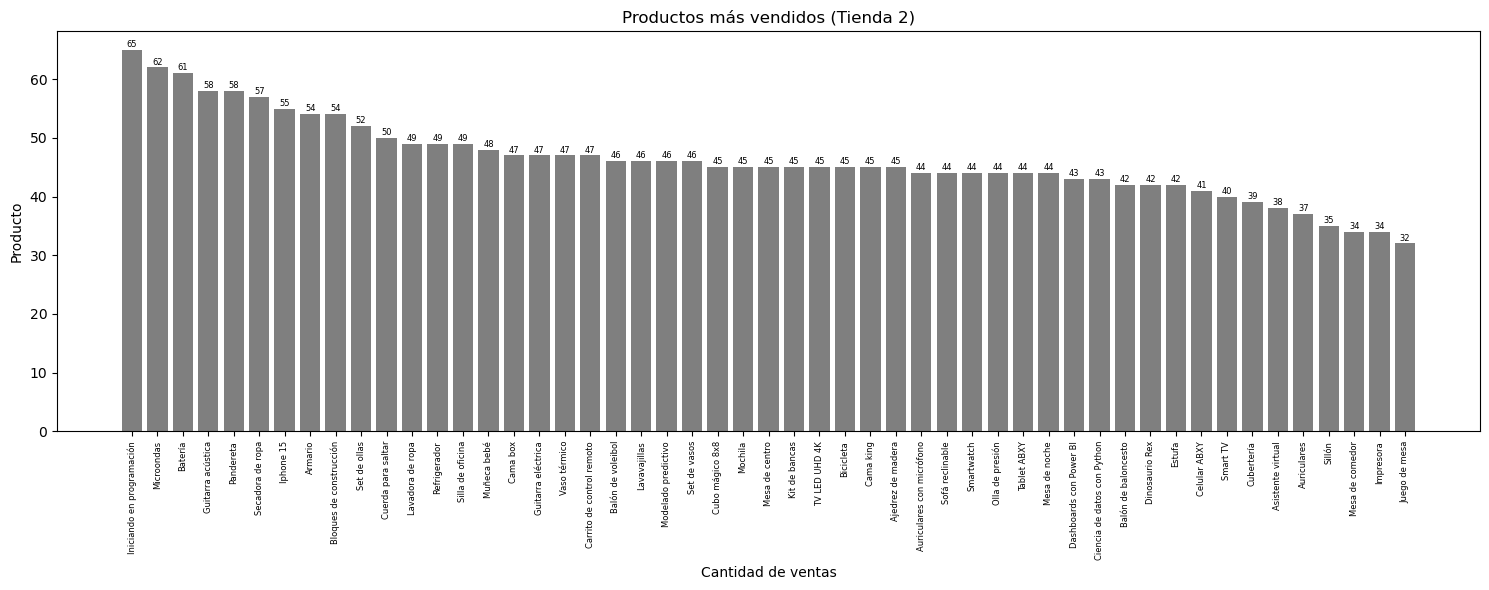

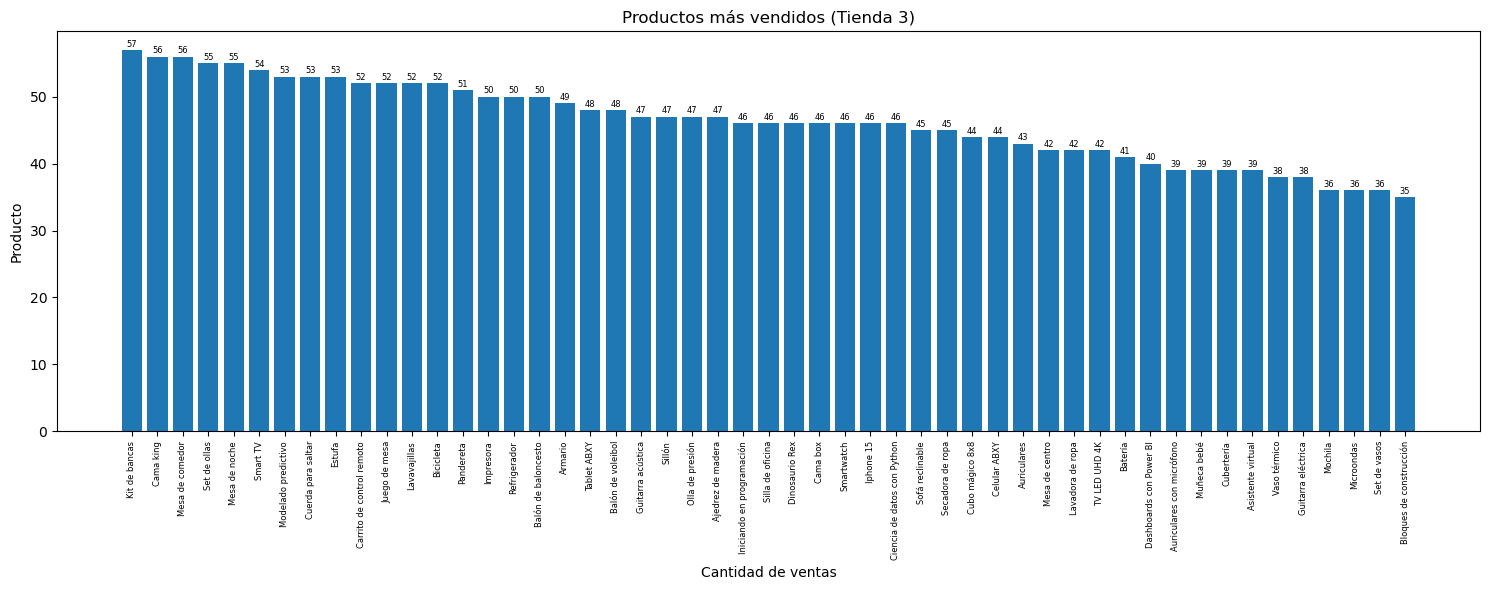

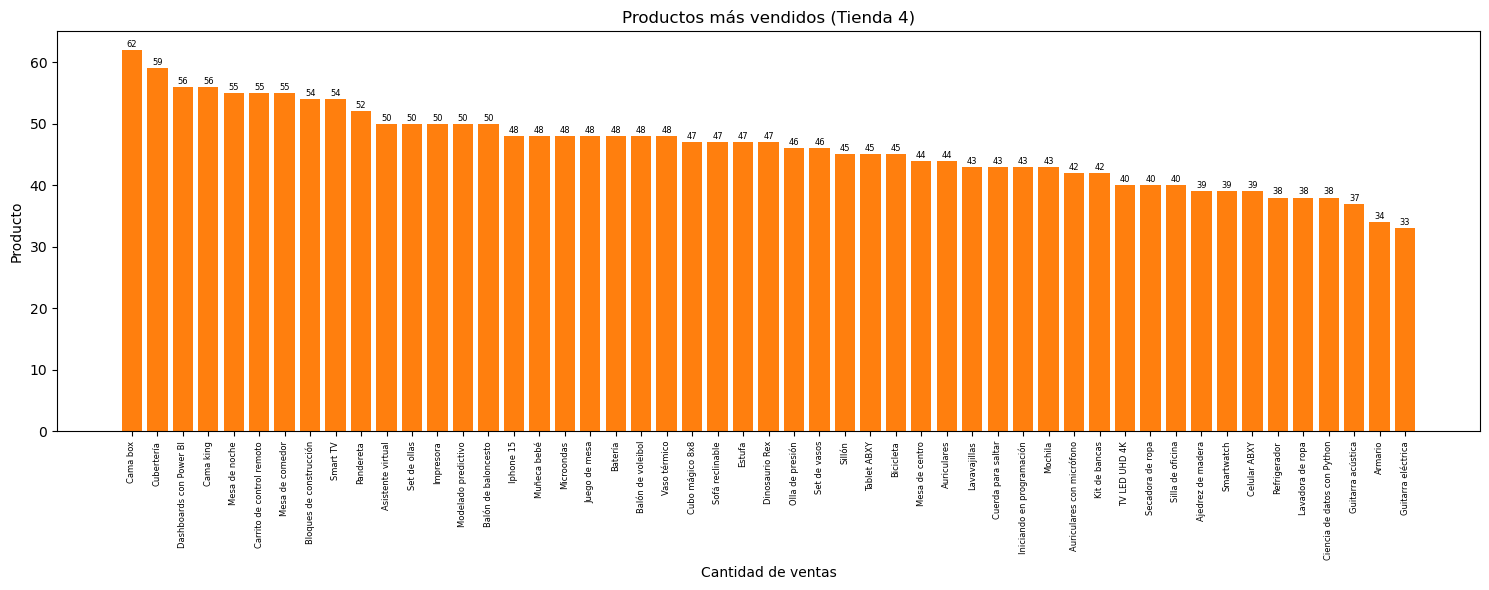

In [18]:
listaProductosMasVendidosPorTienda = [
    productosMasVendidosTienda1,
    productosMasVendidosTienda2,
    productosMasVendidosTienda3,
    productosMasVendidosTienda4
]

nombresTiendas = ["Tienda 1", 
                  "Tienda 2", 
                  "Tienda 3", 
                  "Tienda 4"]

colores = ["tab:red", 
           "tab:gray", 
           "tab:blue", 
           "tab:orange", 
           "tab:green"]

for i, tienda in enumerate(listaProductosMasVendidosPorTienda):
    graficarProductosMasVendidosPorTienda(tienda, nombresTiendas[i], colores[i])

#### Los productos más vendidos son los primeros 5 de la lista de tuplas y los menos vendidos son los últimos 5 de la lista gracias a que groupby devuelve la lista ordenada.

# 5. Envío promedio por tienda

### 1.- Calculo del costo promedio de envío por tienda

In [ ]:
# Costo promedio de envio general por tienda

promedioTienda1 = tienda1["Costo de envío"].mean()
promedioTienda2 = tienda2["Costo de envío"].mean()
promedioTienda3 = tienda3["Costo de envío"].mean()
promedioTienda4 = tienda4["Costo de envío"].mean()

promedioEnvioGeneral = [
    promedioTienda1,
    promedioTienda2,
    promedioTienda3,
    promedioTienda4
]

for i in range(len(promedioEnvioGeneral)):
    print(f"Para la tienda {i + 1} el costo de envío promedio es de: ${promedioEnvioGeneral[i]:.2f}")

Para la tienda 1 el costo de envío promedio es de: $26018.61
Para la tienda 2 el costo de envío promedio es de: $25216.24
Para la tienda 3 el costo de envío promedio es de: $24805.68
Para la tienda 4 el costo de envío promedio es de: $23459.46


### 2.- Gráfico referemte al costo promedio de envío para cada tienda

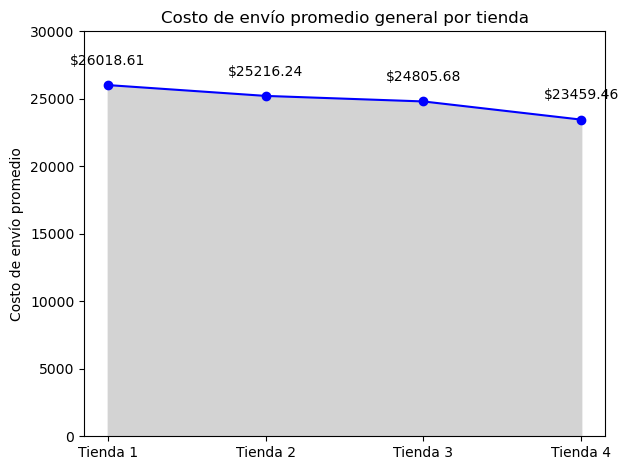

In [26]:
x = np.arange(len(nombresTiendas))

plt.fill_between(x, promedioEnvioGeneral, color='lightgrey')
plt.plot(x, promedioEnvioGeneral, marker='o', color='blue')

plt.xticks(x, nombresTiendas)
plt.ylim(0, 30000)
plt.ylabel("Costo de envío promedio")
plt.title("Costo de envío promedio general por tienda")

for i, valor in enumerate(promedioEnvioGeneral):
    plt.text(i, valor + 1500, f"${valor:.2f}", ha='center')

plt.tight_layout()
plt.show()

# 6. Informe Final

### Introducción 

El informe tiene como objetivo analizar el rendimiento de cuatro tiendas diferentes para recomendar al Sr. João la mejor opción para establecer una alianza comercial. El análisis se basa en factores clave como ingresos totales, diversidad de productos, satisfacción del cliente, productos más vendidos y costos operativos.

### Desarrollo

#### Análisis de Datos

1. Ingresos Totales por Tienda:

El análisis de ingresos revela una clara jerarquía entre las tiendas:

* Tienda 1: $1,150,880,400 (26.1% del total)
* Tienda 2: $1,116,343,500 (25.4% del total)
* Tienda 3: $1,098,019,600 (24.9% del total)
* Tienda 4: $1,038,375,700 (23.6% del total)

La Tienda 1 lidera significativamente en términos de generación de ingresos, con una ventaja de más de $34 millones sobre la segunda mejor tienda.

2. Ventas por categoría:

Todas las tiendas mantienen una cantidad similar de productos por categoría, destacando los muebles como la categoría dominante con entre 450 y 500 productos por tienda, seguidos por los electrónicos con entre 420 y 450. Otras categorías presentes incluyen juguetes, electrodomésticos, deportes y diversión, instrumentos musicales, libros y artículos para el hogar. Esto sugiere un mercado bien establecido con demandas similares en todas las tiendas.

3. Satisfacción del Cliente: 

Las calificaciones promedio muestran diferencias muy muy pequeñas pero importantes:

* Tienda 3: 4.05 (calificación más alta)
* Tienda 2: 4.04 
* Tienda 4: 4.00
* Tienda 1: 3.98 (calificación más baja)

A pesar de generar mayores ingresos, la Tienda 1 presenta la satisfacción del cliente más baja, lo que podría indicar problemas de compra o calidad del servicio.

4. Productos Más Vendidos y Menos vendidos:

Las categorías de mayor volumen son consistentes entre las tiendas, con productos destacados como televisores LED, refrigeradores y muebles diversos. Las diferencias en los volúmenes de venta de los productos más vendidos oscilan entre 30 y 65 unidades, mientras que los productos menos vendidos presentan variaciones menores, de aproximadamente 10 a 20 unidades por tienda.

5. Costos de Envío Promedio:

Los costos promedio de envío por tienda muestran variaciones mínimas:

* Tienda 4: $23,459.46 (más eficiente)
* Tienda 3: $24,805.68
* Tienda 2: $25,216.24
* Tienda 1: $26,018.61 (más costosa)

#### Fortalezas y Debilidades por Tienda

* Tienda 1:

Fortalezas: Mayores ingresos totales y Mayor participación de mercado.

Debilidades: Calificación de satisfacción más baja y Costos de envío por encima del promedio.

* Tienda 2:

Fortalezas: Excelente satisfacción del cliente (4.04), Costo de envios más bajos que Tienda 1 y Segundo lugar en ingresos.

Debilidades: Ingresos menores que Tienda 1.

* Tienda 3: 

Fortalezas:Excelente satisfacción del cliente (4.05), Segundo menor costo de envío y Balance equilibrado entre ingresos y eficiencia.

Debilidades: Ingresos totales en tercer lugar.

* Tienda 4:

Fortalezas: Costos de envío más bajos y Buena satisfacción del cliente (4.00).

Debilidades: Menores ingresos totales y Menor participación de mercado.

### Recomendación Final

La Tienda 2 es la mejor opción para vender, ya que ofrece la combinación más equilibrada y rentable entre rendimiento financiero y excelencia operativa. Con ingresos de $1,116,343,500 (25.4% del total), se posiciona como la segunda generadora de ingresos con una diferencia mínima respecto a la Tienda 1, pero sin sus debilidades críticas en satisfacción del cliente, además con una diferencia superior de alrededor de 18M con respecto a la Tienda 3. Su calificación de 4.04 demuestra un servicio al cliente consistentemente excelente, superando a la Tienda 1 y prácticamente igualando a la Tienda 3. Además, mantiene costos de envío competitivos de $25,216.24 (con tan solo una diferencia de envio de 410.56 con respecto a la Tienda 3), significativamente menores que la Tienda 1. Esta combinación de ingresos sólidos, alta satisfacción del cliente y eficiencia operativa representa el modelo de negocio más sostenible y con menor riesgo, evitando tanto los problemas de servicio de la Tienda 1 como la menor capacidad de generación de ingresos de las Tiendas 3 y 4.